
# Analitik Pelanggan Supermarket Strategi Berbasis Data untuk Meningkatkan Loyalitas & Pendapatan

### 🎯 Tujuan Analisis
Analisis ini bertujuan untuk memahami perilaku pelanggan supermarket, guna memberikan rekomendasi strategis yang mampu meningkatkan pendapatan, mempertahankan loyalitas pelanggan, serta mengoptimalkan keputusan bisnis berdasarkan data transaksi pelanggan.

### 💡 Insight Utama
1. **Dominasi Pelanggan Produktif**: Kelompok usia 30–40 tahun dengan status bekerja memberikan kontribusi pendapatan tertinggi.
2. **Hubungan Positif Loyalitas dengan Pendapatan**: Pelanggan dengan skor loyalitas tinggi memiliki kecenderungan belanja lebih besar dan konsisten.
3. **Pengaruh Jumlah Anak**: Pelanggan tanpa anak cenderung memiliki total pengeluaran lebih tinggi dibandingkan mereka yang memiliki tanggungan anak.
4. **Korelasi Transaksi dengan Pengeluaran**: Semakin tinggi jumlah transaksi pelanggan, semakin tinggi pula total belanja mereka.
5. **Preferensi Kanal Belanja**: Kanal toko fisik memberikan kontribusi pendapatan tertinggi, diikuti oleh web (online), sedangkan katalog kurang efektif.
6. **Profitabilitas Kategori Produk**: Wine dan produk daging merupakan kategori produk dengan profitabilitas tertinggi.
7. **Distribusi Promosi Kurang Merata**: Mayoritas pelanggan belum pernah menerima diskon atau promosi kampanye, menunjukkan adanya ruang perbaikan dalam strategi distribusi promosi.
8. **Pentingnya CLV**: Pelanggan dengan nilai Customer Lifetime Value (CLV) tinggi memiliki potensi besar untuk memberikan nilai jangka panjang yang signifikan.

### 🚀 Rekomendasi Strategis
1. **Segmentasi Pelanggan Produktif**: Prioritaskan promosi dan program loyalitas pada kelompok usia 30–40 tahun yang aktif bekerja.
2. **Optimasi Kanal Belanja**: Tingkatkan pengalaman belanja fisik sambil memperkuat kanal web dengan kampanye digital yang menarik.
3. **Penguatan Program Loyalitas**: Implementasi sistem poin reward, akses eksklusif, dan personalized marketing terutama untuk pelanggan dengan CLV tinggi.
4. **Evaluasi Strategi Promosi**: Tingkatkan distribusi promosi yang lebih merata untuk mendorong partisipasi lebih luas dari pelanggan.
5. **Pengelolaan Kategori Produk**: Fokuskan sumber daya pada produk dengan profitabilitas tinggi seperti Wine dan Daging melalui promosi cross-selling atau bundling.
6. **Audit Rutin Outlier Transaksi**: Lakukan verifikasi rutin untuk data ekstrem agar menjaga integritas analisis bisnis.


Melalui insight dan rekomendasi ini, supermarket dapat lebih efektif dalam strategi pemasaran, meningkatkan pendapatan secara signifikan, serta mempertahankan pelanggan secara optimal dalam jangka panjang.

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

#Reading datasets
df = pd.read_csv(r'C:\Users\geral\OneDrive\Desktop\Supermarket Customers.csv',delimiter=";")
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df.shape

(2240, 29)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Menangani missing values pada kolom Income
df["Income"].fillna(df["Income"].median(), inplace=True)

C:\Users\geral\AppData\Local\Temp\ipykernel_43588\1899060636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(df["Income"].median(), inplace=True)


In [7]:
# Mengecek data duplikat
duplicates = df.duplicated().sum()
duplicates

0

In [8]:
# Mengubah kolom Dt_Customer menjadi datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d/%m/%Y")

In [9]:
# Mengecek outlier menggunakan IQR method pada kolom Income
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
# Menampilkan jumlah outlier
outliers_count = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)].shape[0]
outliers_count

8

In [12]:
scaler = MinMaxScaler()
df["Income_Scaled"] = scaler.fit_transform(df[["Income"]])


# Membuat kolom "Received_Discount" tanpa menggunakan if
campaign_columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
df["Received_Discount"] = df[campaign_columns].sum(axis=1) > 0

# Konversi ke tipe boolean agar lebih eksplisit
df["Received_Discount"] = df["Received_Discount"].astype(bool)

In [13]:
# Set style
sns.set(style="whitegrid")

In [14]:
#Menggunakan nama kolom secara eksplisit untuk menghitung total belanja.
spent_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spent_columns].sum(axis=1)

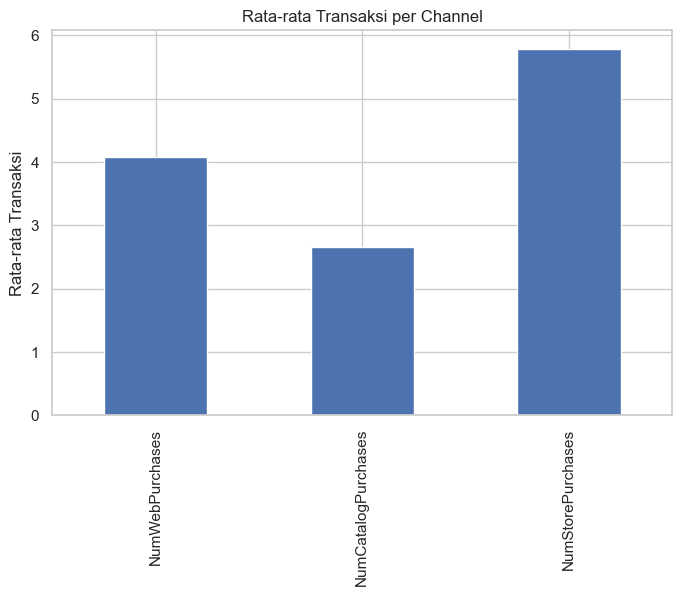

In [15]:
#rata-rata transaksi perchannel
channel_avg = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
channel_avg.plot(kind='bar', figsize=(8,5))
plt.title('Rata-rata Transaksi per Channel')
plt.ylabel('Rata-rata Transaksi')
plt.show()

Grafik ini menunjukkan rata-rata transaksi yang dilakukan pelanggan melalui tiga saluran penjualan utama: Web (Online), Catalog, dan Toko Fisik.

Dari grafik terlihat bahwa:

1. Channel Toko Fisik (Store Purchases) memiliki rata-rata transaksi tertinggi dibandingkan kanal lainnya, yang mengindikasikan bahwa mayoritas pelanggan masih memilih untuk melakukan pembelian secara langsung di toko fisik. Hal ini bisa disebabkan oleh keinginan pelanggan untuk melihat produk secara langsung sebelum membeli, atau karena kenyamanan dalam proses transaksi secara offline.

2. Channel Web (Online Purchases) menempati posisi kedua, menunjukkan bahwa kanal digital sudah mulai tumbuh dan digunakan secara aktif oleh pelanggan, meskipun belum melampaui dominasi toko fisik.

3. Channel Catalog memiliki rata-rata transaksi terendah, yang mengindikasikan bahwa metode belanja ini sudah mulai ditinggalkan dan kurang relevan dengan preferensi pelanggan saat ini.

Visualisasi ini dapat menjadi acuan dalam mengarahkan strategi bisnis, seperti memperkuat infrastruktur toko fisik untuk mempertahankan loyalitas pelanggan, serta mengembangkan kanal online guna mengakomodasi pelanggan digital yang terus meningkat.

In [16]:
# Efektivitas Kampanye Promosi
campaign_columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
campaign_success = df[campaign_columns].sum()

C:\Users\geral\AppData\Local\Temp\ipykernel_43588\3008651245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_success.index, y=campaign_success.values, palette="viridis")


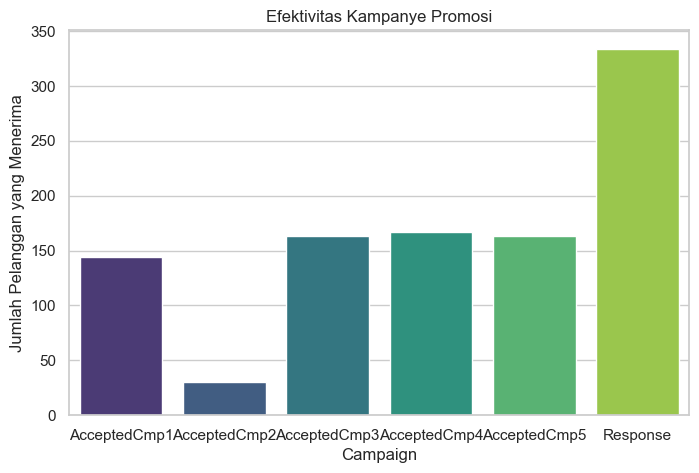

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=campaign_success.index, y=campaign_success.values, palette="viridis")
plt.title("Efektivitas Kampanye Promosi")
plt.xlabel("Campaign")
plt.ylabel("Jumlah Pelanggan yang Menerima")
plt.show()

Grafik ini memperlihatkan tingkat keberhasilan berbagai kampanye promosi yang dijalankan perusahaan kepada pelanggan, berdasarkan jumlah pelanggan yang menerima penawaran kampanye tersebut.

Dari hasil visualisasi terlihat bahwa:

1. Kampanye Response merupakan kampanye yang paling efektif dalam menarik minat pelanggan dibandingkan kampanye lainnya. Ini mengindikasikan bahwa kampanye terbaru memiliki pendekatan atau penawaran yang lebih relevan bagi pelanggan.

2. Kampanye 1 dan Kampanye 5 memiliki tingkat keberhasilan yang cukup signifikan, menunjukkan bahwa strategi dan komunikasi dari dua kampanye ini juga efektif menarik perhatian pelanggan.

3. Sebaliknya, Kampanye 2, 3, dan 4 memiliki tingkat keberhasilan yang relatif rendah. Ini mengindikasikan bahwa strategi pada kampanye ini kurang optimal atau kurang sesuai dengan minat pelanggan.

Dengan memahami efektivitas masing-masing kampanye, tim pemasaran dapat mengalokasikan sumber daya lebih efisien dan meningkatkan performa promosi secara keseluruhan. Kampanye yang terbukti berhasil dapat dijadikan acuan untuk pengembangan kampanye selanjutnya, sementara kampanye dengan performa rendah perlu dievaluasi ulang dari segi pesan, timing, maupun target audiens-nya.

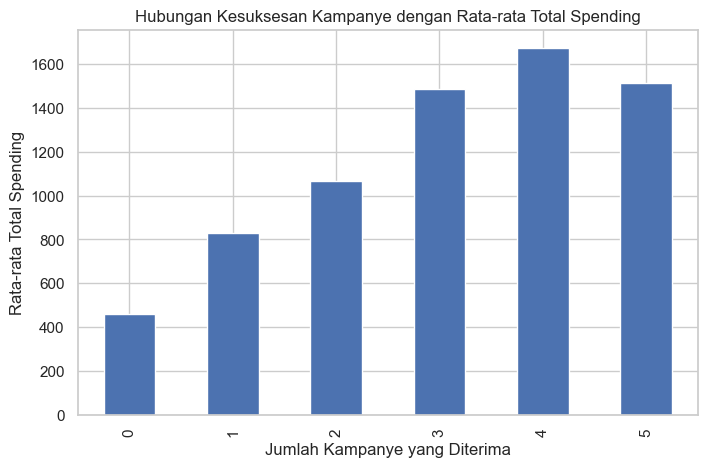

In [18]:
## Hubungan Kesuksesan Kampanye dengan Rata-rata Total Spending
df['Campaign_Success'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
campaign_revenue = df.groupby('Campaign_Success')['Total_Spending'].mean()
campaign_revenue.plot(kind='bar', figsize=(8,5))
plt.title('Hubungan Kesuksesan Kampanye dengan Rata-rata Total Spending')
plt.xlabel('Jumlah Kampanye yang Diterima')
plt.ylabel('Rata-rata Total Spending')
plt.show()

Grafik ini menggambarkan rata-rata total pengeluaran pelanggan (Total Spending) berdasarkan jumlah kampanye promosi yang mereka terima dan terima (berhasil).

Dari grafik terlihat bahwa:

1. Terdapat tren kenaikan yang jelas pada rata-rata pengeluaran seiring dengan meningkatnya jumlah kampanye yang diterima oleh pelanggan, terutama hingga pada 4 kampanye yang berhasil.

2. Pelanggan yang menerima 4 kampanye promosi menunjukkan rata-rata pengeluaran tertinggi, menandakan bahwa kampanye yang konsisten dan tepat sasaran mampu mendorong perilaku belanja yang lebih besar.

3. Menariknya, terdapat sedikit penurunan rata-rata pengeluaran pada pelanggan yang menerima 5 kampanye, yang dapat mengindikasikan adanya titik jenuh terhadap promosi yang terlalu sering, atau pelanggan yang merespons banyak kampanye cenderung tidak memiliki daya beli setinggi kelompok sebelumnya.

Visualisasi ini menunjukkan bahwa keberhasilan kampanye promosi memiliki korelasi positif terhadap total pengeluaran pelanggan, namun perlu diperhatikan batas optimal dalam frekuensi kampanye agar tidak berdampak negatif pada efektivitasnya. Strategi promosi yang tepat dan seimbang akan mendorong peningkatan spending sekaligus menjaga keterlibatan pelanggan.

In [19]:
# Tentukan bins sesuai dengan analisis atau pengetahuan domain
bins = [0, 100, 500, 1000, df["Total_Spending"].max()]
labels = ["Low", "Medium", "High", "Very High"]
# Segmentasi berdasarkan bins yang telah ditentukan
df["Spending_Category"] = pd.cut(df["Total_Spending"], bins=bins, labels=labels)

C:\Users\geral\AppData\Local\Temp\ipykernel_43588\3213344129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Spending_Category"], palette="coolwarm")


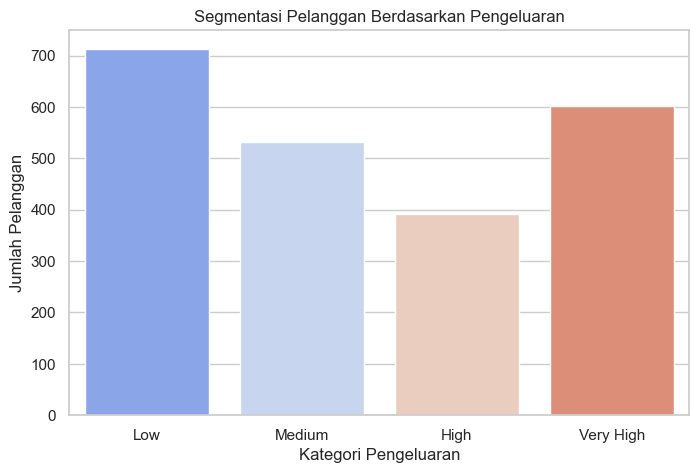

In [20]:
# Visualisasi segmentasi pelanggan berdasarkan pengeluaran
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Spending_Category"], palette="coolwarm")
plt.title("Segmentasi Pelanggan Berdasarkan Pengeluaran")
plt.xlabel("Kategori Pengeluaran")
plt.ylabel("Jumlah Pelanggan")
plt.show()

Grafik ini menunjukkan jumlah pelanggan yang dikelompokkan berdasarkan kategori pengeluaran total mereka, yang telah diklasifikasikan ke dalam beberapa segmen seperti Low, Medium, High, dan Very High Spending.

Dari visualisasi terlihat:

1. Mayoritas pelanggan berada dalam kategori pengeluaran rendah (Low), menunjukkan bahwa sebagian besar pelanggan berbelanja dalam jumlah yang relatif kecil.

2. Kategori Medium Spending juga memiliki jumlah pelanggan yang cukup besar, menandakan bahwa segmen ini mencerminkan pelanggan dengan kebiasaan belanja sedang dan berpotensi untuk dikembangkan lebih lanjut.

3. Kategori High Spending memiliki jumlah pelanggan yang relatif sedikit, namun berpotensi menjadi pelanggan bernilai tinggi (high-value customers) yang penting untuk difokuskan dalam strategi loyalitas.

4. Kategori Very High Spending menunjukkan adanya kelompok eksklusif pelanggan dengan nilai pengeluaran yang sangat tinggi. Meskipun jumlahnya tidak sebesar kategori lainnya, segmen ini sangat penting karena mereka berkontribusi signifikan terhadap total pendapatan dan layak mendapatkan perlakuan khusus dalam strategi pemasaran, seperti program loyalitas premium atau personalisasi layanan.

Visualisasi ini memberikan arahan strategis dalam memahami sebaran pelanggan berdasarkan nilai transaksi mereka, sehingga perusahaan dapat menyesuaikan pendekatan pemasaran, retensi, dan upselling sesuai dengan karakteristik tiap segmen.

In [21]:
# Data preprocessing: Add necessary columns again
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d/%m/%Y")
df["Total_Spending"] = df.iloc[:, 9:15].sum(axis=1)
df["Age"] = 2025 - df["Year_Birth"]
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

C:\Users\geral\AppData\Local\Temp\ipykernel_43588\4070245977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Total_Children"], y=df["Total_Spending"], palette="coolwarm")


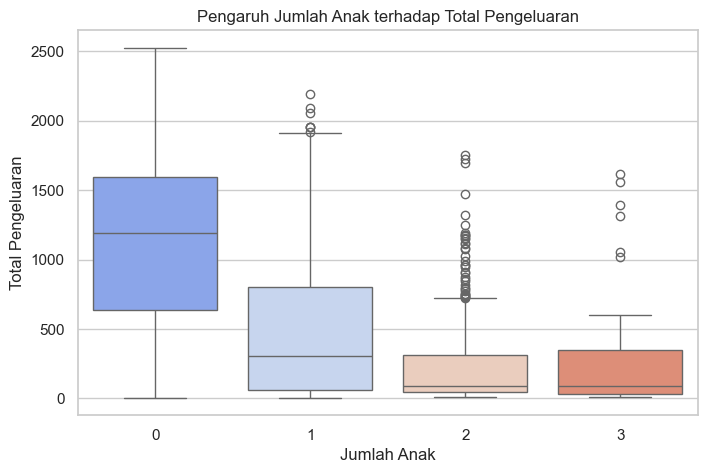

In [22]:
# Pengaruh jumlah anak terhadap total pengeluaran
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Total_Children"], y=df["Total_Spending"], palette="coolwarm")
plt.title("Pengaruh Jumlah Anak terhadap Total Pengeluaran")
plt.xlabel("Jumlah Anak")
plt.ylabel("Total Pengeluaran")
plt.show()

Grafik boxplot ini menggambarkan distribusi total pengeluaran pelanggan berdasarkan jumlah anak yang dimiliki, yang merupakan kombinasi dari anak kecil dan remaja di rumah (Total_Children = Kidhome + Teenhome).

Dari visualisasi terlihat bahwa:

1. Pelanggan dengan 0 anak memiliki distribusi pengeluaran yang paling tinggi, termasuk nilai maksimum yang signifikan. Hal ini mengindikasikan bahwa pelanggan tanpa tanggungan anak cenderung memiliki daya beli lebih besar.

2. Pelanggan dengan 1 anak menunjukkan pengeluaran yang cukup bervariasi, namun median pengeluarannya sedikit lebih rendah dibandingkan yang tidak memiliki anak.

3. Pelanggan dengan 2 anak atau lebih cenderung memiliki total pengeluaran yang lebih rendah secara median maupun distribusi keseluruhan.

4. Pelanggan dengan 3 anak menunjukkan pola pengeluaran yang paling rendah di antara seluruh kelompok, dengan distribusi yang sempit dan nilai maksimum yang tidak terlalu tinggi. Hal ini kemungkinan besar disebabkan oleh meningkatnya beban biaya hidup dan tanggungan keluarga, yang berdampak pada daya beli dan alokasi pengeluaran rumah tangga.

Visualisasi ini memberikan gambaran penting bahwa jumlah anak di rumah tangga merupakan faktor yang dapat memengaruhi perilaku belanja, dan perlu dipertimbangkan dalam strategi pemasaran berbasis segmen pelanggan—misalnya dengan pendekatan penawaran hemat atau bundling untuk pelanggan dengan banyak tanggungan keluarga.

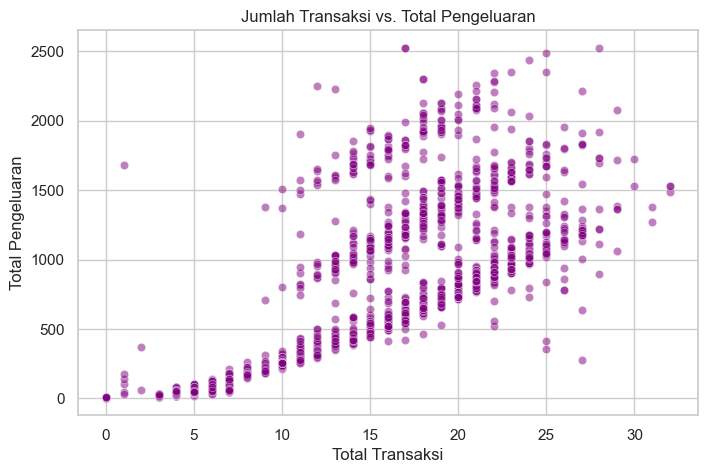

In [23]:
# Korelasi antara jumlah transaksi dan total belanja
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["NumStorePurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"],
                y=df["Total_Spending"], alpha=0.5, color="purple")
plt.title("Jumlah Transaksi vs. Total Pengeluaran")
plt.xlabel("Total Transaksi")
plt.ylabel("Total Pengeluaran")
plt.show()

Grafik scatterplot ini menunjukkan hubungan antara jumlah total transaksi pelanggan (gabungan dari pembelian di toko, online, dan katalog) dengan total pengeluaran mereka (Total Spending).

Dari hasil visualisasi terlihat bahwa:

1. Secara umum terdapat korelasi positif antara jumlah transaksi dan total pengeluaran—semakin sering pelanggan melakukan transaksi, semakin besar pula pengeluaran yang mereka lakukan.

2. Sebagian besar pelanggan melakukan antara 10 hingga 20 transaksi, dan berada dalam rentang pengeluaran sekitar 500 hingga 1000 satuan.

3. Menariknya, meskipun ada pelanggan dengan jumlah transaksi yang sangat tinggi (di atas 25 kali), tidak semuanya memiliki total pengeluaran tertinggi. Hal ini mengindikasikan bahwa frekuensi tidak selalu berbanding lurus dengan nilai belanja, kemungkinan karena pembelian dalam jumlah kecil atau produk bernilai rendah.

4. Sebaliknya, ada pelanggan dengan jumlah transaksi sedang namun dengan pengeluaran yang sangat tinggi—kelompok ini berpotensi merupakan pelanggan bernilai tinggi (high-value customers) yang perlu mendapatkan perhatian khusus.

Visualisasi ini memberikan insight penting dalam memahami pola belanja pelanggan. Strategi yang menggabungkan frekuensi transaksi dan nilai belanja dapat digunakan untuk mengidentifikasi pelanggan loyal sekaligus bernilai tinggi, serta merancang program yang dapat mendorong peningkatan transaksi dari pelanggan dengan frekuensi rendah namun potensi pengeluaran besar.

In [24]:
# Pastikan kolom "Received_Discount" ada sebelum digunakan
if "Received_Discount" not in df.columns:
    df["Received_Discount"] = df[
        ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
    ].sum(axis=1) > 0

# 1. Analisis Profitabilitas Berdasarkan Kategori Produk (Bar Chart)
product_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
product_profit = df[product_columns].sum()
fig1 = px.bar(x=product_profit.index, y=product_profit.values, color=product_profit.index, text=product_profit.values,
              title="Total Pengeluaran per Kategori Produk (Profitabilitas)",
              labels={"x": "Kategori Produk", "y": "Total Pengeluaran"})
fig1.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig1.show()




Grafik ini menggambarkan total pengeluaran pelanggan untuk masing-masing kategori produk, yang dapat digunakan untuk mengukur potensi profitabilitas tiap kategori.

Dari visualisasi terlihat bahwa:

1. Produk Wine merupakan kategori dengan total pengeluaran tertinggi secara signifikan, mencapai lebih dari 680.000. Hal ini menunjukkan bahwa produk wine sangat diminati pelanggan dan menjadi kontributor utama terhadap pendapatan perusahaan.

2. Produk Daging (Meat Products) berada di posisi kedua dengan pengeluaran lebih dari 370.000, menandakan permintaan yang juga cukup tinggi dan stabil.

3. Kategori lainnya seperti Gold Products, Fish Products, dan Sweet Products memiliki pengeluaran yang lebih rendah, namun tetap berkontribusi terhadap total pendapatan dan mungkin memiliki margin keuntungan yang lebih tinggi jika dikelola secara efisien.

4. Produk Buah (Fruits) menempati posisi terendah dalam hal pengeluaran, yang bisa menjadi sinyal bahwa produk ini kurang menarik atau memiliki positioning yang lemah dibanding kategori lainnya.

Insight ini dapat dimanfaatkan oleh tim manajemen untuk menentukan fokus pengembangan produk, promosi, maupun strategi inventory. Produk dengan kontribusi tinggi seperti Wine dan Meat dapat diprioritaskan untuk dijaga kualitas dan ketersediaannya, sementara kategori dengan performa rendah dapat dievaluasi untuk strategi relaunch, bundling, atau bahkan disinsentif bila tidak profitable.

In [25]:
# 2. Proporsi Pelanggan yang Menerima Diskon vs. Tidak (Pie Chart)
discount_counts = df["Received_Discount"].value_counts()
fig2 = px.pie(values=discount_counts.values, names=discount_counts.index.map({False: "Tidak Menerima Diskon", True: "Menerima Diskon"}), 
              title="Proporsi Pelanggan yang Menerima Diskon",
              color_discrete_sequence=px.colors.qualitative.Pastel)
fig2.show()

Grafik pie chart ini menggambarkan proporsi pelanggan yang pernah menerima diskon atau promosi kampanye, dibandingkan dengan mereka yang tidak pernah menerima diskon sama sekali.

Dari hasil visualisasi terlihat bahwa:

1. Sekitar 27,2% pelanggan pernah menerima diskon atau promo kampanye dari perusahaan, baik melalui salah satu dari lima kampanye sebelumnya maupun campaign terbaru (Response).

2. Sebaliknya, mayoritas pelanggan—sekitar 72,8%—belum pernah menerima diskon sama sekali, yang dapat diartikan sebagai peluang besar untuk melakukan penetrasi kampanye ke segmen yang belum tersentuh.

3. Rendahnya proporsi pelanggan yang menerima diskon bisa menjadi indikasi bahwa program kampanye masih belum menjangkau seluruh basis pelanggan, atau terdapat penyaringan yang terlalu ketat dalam targeting promosi.

Informasi ini sangat berharga untuk evaluasi strategi promosi. Perusahaan bisa mempertimbangkan pendekatan yang lebih inklusif atau berbasis segmentasi perilaku dalam mendistribusikan diskon, guna meningkatkan engagement dan potensi konversi penjualan dari segmen pelanggan yang belum tersentuh.

In [26]:
# 3. Performa Kanal Pembelian (Total Revenue per Kanal)
channel_revenue = {
    "Web": (df["NumWebPurchases"] * df["Total_Spending"]).sum(),
    "Catalog": (df["NumCatalogPurchases"] * df["Total_Spending"]).sum(),
    "Store": (df["NumStorePurchases"] * df["Total_Spending"]).sum(),
}



fig3 = px.bar(x=list(channel_revenue.keys()), y=list(channel_revenue.values()), color=list(channel_revenue.keys()),
              title="Total Revenue Berdasarkan Kanal Pembelian", labels={"x": "Kanal", "y": "Total Revenue"})
fig3.update_traces(texttemplate='%{y:.2f}', textposition='outside')
fig3.show()

Grafik ini menunjukkan total pendapatan (revenue) yang dihasilkan dari tiga kanal pembelian: Web, Catalog, dan Store, berdasarkan frekuensi transaksi dikalikan dengan total spending dari pelanggan.

Dari hasil visualisasi terlihat bahwa:

1. Kanal Store (Toko Fisik) memberikan kontribusi pendapatan tertinggi dibandingkan kanal lainnya, menandakan bahwa pengalaman belanja langsung masih menjadi pilihan utama pelanggan. Pendapatan dari kanal ini mencapai lebih dari 5,3 juta satuan.

2. Kanal Web (Online) menyusul di posisi kedua dengan total revenue sekitar 3,6 juta satuan, mencerminkan pertumbuhan kanal digital yang cukup kuat, namun masih belum sepenuhnya menggantikan dominasi toko fisik.

3. Kanal Catalog menghasilkan pendapatan terendah, dengan kontribusi sekitar 3,4 juta satuan. Hal ini menunjukkan bahwa metode pembelian berbasis katalog kemungkinan mulai kehilangan relevansi di era belanja digital dan instan saat ini.

Visualisasi ini memberikan arahan strategis penting dalam hal alokasi sumber daya dan investasi antar kanal pembelian. Perusahaan dapat terus memperkuat kanal toko fisik sambil mengembangkan pengalaman belanja online untuk mendorong pertumbuhan pendapatan yang lebih berkelanjutan, serta mempertimbangkan efisiensi dalam pengelolaan kanal katalog.

C:\Users\geral\AppData\Local\Temp\ipykernel_43588\1058453064.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





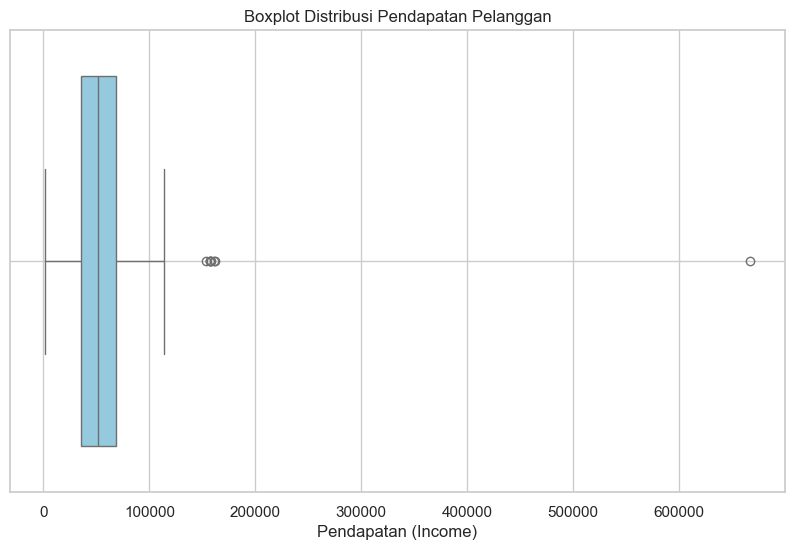

In [27]:
# Load data
df = pd.read_csv(r'C:\Users\geral\OneDrive\Desktop\Supermarket Customers.csv',delimiter=";")
df['Income'].fillna(df['Income'].median(), inplace=True)

# Mengubah Dt_Customer menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y')

# Hitung Total Spent
spent_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spent_columns].sum(axis=1)

#1. Boxplot Distribusi Pendapatan
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'], color='skyblue')
plt.title('Boxplot Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan (Income)')
plt.grid(True)
plt.show()



In [28]:
df = df[df['Income'] != 666666]
df["Income"].nlargest(10)

617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
Name: Income, dtype: float64

In [29]:
df["Income"].nlargest(10)

617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
Name: Income, dtype: float64

Visualisasi ini menunjukkan distribusi pendapatan pelanggan setelah dilakukan proses pembersihan data dengan menghapus outlier menggunakan metode Interquartile Range (IQR). Penghapusan outlier dilakukan untuk mendapatkan gambaran yang lebih representatif terhadap mayoritas pelanggan.

Dari hasil visualisasi terlihat bahwa:

1. Sebagian besar pelanggan memiliki pendapatan dalam rentang yang cukup konsisten dan terkonsentrasi, dengan nilai median yang mencerminkan rata-rata pendapatan pelanggan secara umum.

2. Tidak terdapat nilai-nilai ekstrem yang sebelumnya dapat mempengaruhi interpretasi dan analisis pendapatan secara keseluruhan, sehingga distribusi menjadi lebih bersih dan mudah dibaca.

3. Persebaran pendapatan cenderung sedikit condong ke kanan (right-skewed), yang menandakan masih adanya sebagian kecil pelanggan dengan pendapatan lebih tinggi dari mayoritas, namun tidak sampai menjadi outlier.

Visualisasi ini membantu perusahaan dalam memahami profil ekonomi pelanggan secara lebih akurat, yang dapat dijadikan dasar dalam perumusan strategi segmentasi dan penentuan harga produk atau layanan yang sesuai dengan daya beli pelanggan.

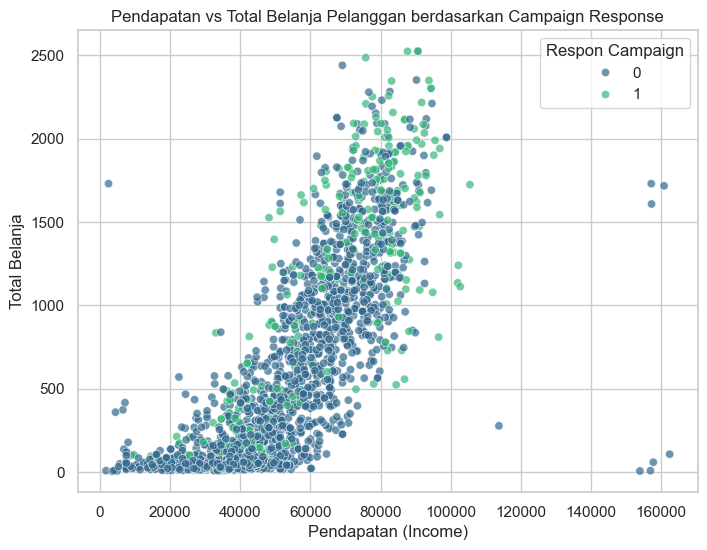

In [30]:
#2. Scatterplot Pendapatan vs Total Belanja
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spending', hue='Response', palette='viridis', alpha=0.7)
plt.title('Pendapatan vs Total Belanja Pelanggan berdasarkan Campaign Response')
plt.xlabel('Pendapatan (Income)')
plt.ylabel('Total Belanja')
plt.legend(title='Respon Campaign')
plt.grid(True)
plt.show()

Grafik ini menunjukkan hubungan antara pendapatan pelanggan dengan total belanja mereka, serta dibedakan berdasarkan respon terhadap campaign pemasaran (0 = tidak merespons, 1 = merespons).

Dari hasil visualisasi terlihat bahwa:

1. Terdapat korelasi positif yang cukup jelas antara pendapatan dan total belanja—semakin tinggi pendapatan seorang pelanggan, cenderung semakin tinggi pula total belanja yang mereka lakukan.

2. Pelanggan yang memberikan respon terhadap campaign pemasaran (ditandai dengan warna hijau) tersebar di berbagai tingkat pendapatan dan pengeluaran, namun lebih terkonsentrasi pada kelompok pelanggan dengan pendapatan dan pengeluaran menengah ke atas.

3. ebaliknya, pelanggan dengan pendapatan dan total belanja rendah sebagian besar tidak merespon campaign yang diberikan, yang mengindikasikan bahwa campaign perusahaan lebih efektif pada segmen pelanggan tertentu.

Visualisasi ini memberikan wawasan penting bahwa efektivitas campaign pemasaran cenderung lebih tinggi pada pelanggan dengan daya beli yang lebih kuat. Oleh karena itu, strategi campaign ke depan dapat diarahkan secara lebih personal dan ditargetkan pada segmen dengan potensi respons yang lebih tinggi.

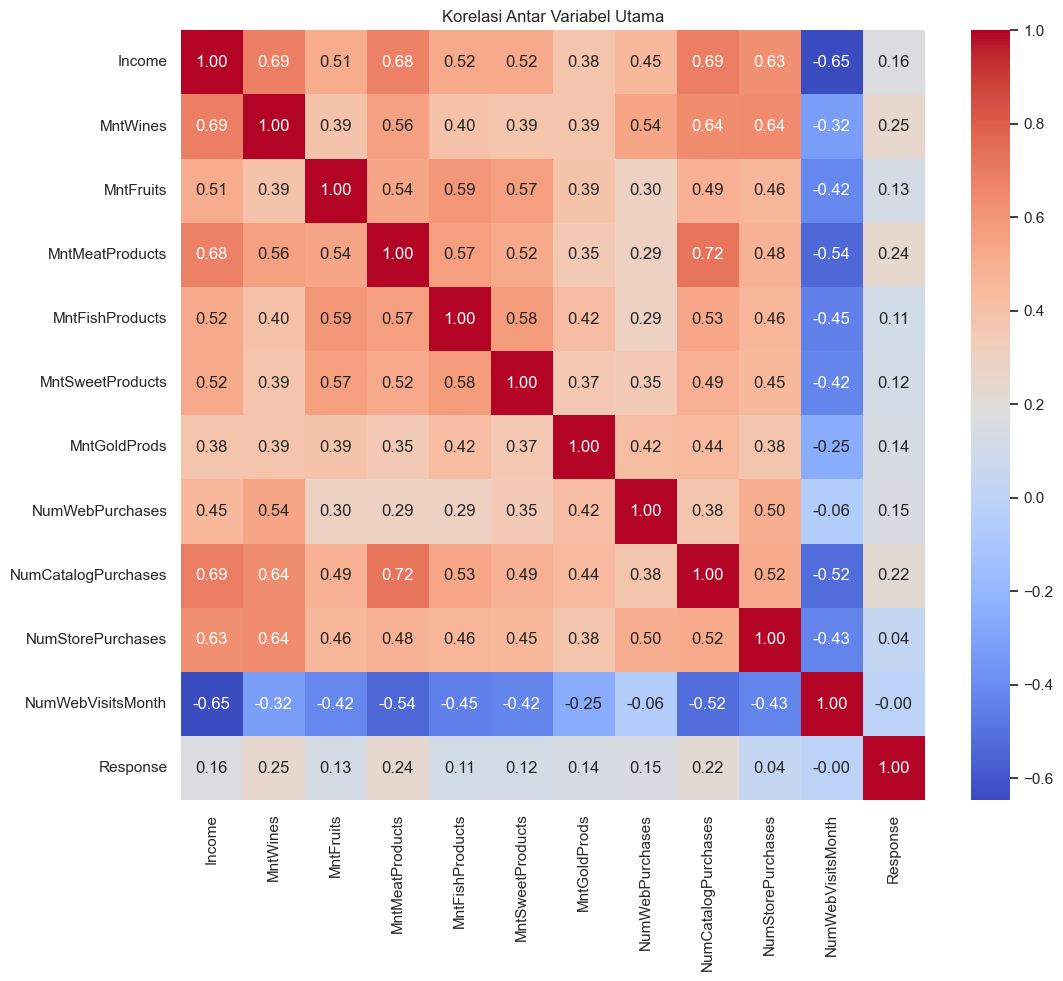

In [31]:
#3. Korelasi antar Variabel Utama
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth', 'Response']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Utama')
plt.show()

Heatmap ini menunjukkan korelasi antar variabel utama dalam data pelanggan, termasuk pendapatan, pengeluaran per kategori produk, frekuensi pembelian, serta interaksi dengan kampanye promosi.

Dari hasil visualisasi terlihat bahwa:

1. income memiliki korelasi positif yang cukup kuat dengan kategori pengeluaran seperti MntWines (0.69), MntMeatProducts (0.68), dan NumCatalogPurchases (0.69), yang menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung berbelanja lebih banyak di kategori-kategori tersebut.

2. Korelasi tinggi juga terlihat antar sesama kategori pengeluaran, misalnya antara MntMeatProducts dan MntFishProducts (0.57), atau MntSweetProducts dan MntFruits (0.57), mengindikasikan adanya pola pembelian yang saling terkait.

3. NumWebVisitsMonth memiliki korelasi negatif terhadap banyak variabel, termasuk Income (-0.65) dan Total Spending secara tidak langsung. Hal ini bisa menunjukkan bahwa pelanggan yang sering mengunjungi website justru tidak selalu melakukan pembelian, atau lebih banyak berasal dari segmen pendapatan rendah yang sekadar menjelajah.

4. Korelasi antara variabel-variabel transaksi (seperti NumCatalogPurchases, NumStorePurchases) dengan Response terhadap kampanye promosi relatif lemah (< 0.25), yang mengindikasikan bahwa keberhasilan kampanye tidak sepenuhnya tergantung pada seberapa sering pelanggan bertransaksi.

Visualisasi ini membantu mengidentifikasi hubungan yang relevan dalam perilaku pelanggan, yang bisa menjadi dasar dalam menyusun strategi pemasaran, segmentasi, dan penawaran produk yang lebih tepat sasaran.


### 💰 Analisis Customer Lifetime Value (CLV)
> CLV adalah estimasi nilai pelanggan sepanjang hubungan mereka dengan bisnis.  
> Di sini, kita menghitung CLV secara sederhana sebagai rata-rata total belanja per pelanggan.

- Pelanggan dengan CLV tertinggi berpotensi memberikan nilai jangka panjang terbesar.
- Tim manajemen bisa memprioritaskan loyalti dan layanan lebih untuk kelompok ini.
- Strategi retensi berbasis CLV akan lebih efisien dan ROI-nya tinggi.

Dengan menghitung CLV berdasarkan pengeluaran rata-rata dan frekuensi belanja, kita dapat mengidentifikasi pelanggan yang memberikan nilai jangka panjang tertinggi.
Pelanggan ini bisa diprioritaskan dalam kampanye loyalitas, personalized promo, dan program VIP.


In [32]:

# Buat kolom total belanja per customer
df['Total_Belanja'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)

# Gunakan ID sebagai CustomerID
df['CustomerID'] = df['ID']

# Hitung CLV sederhana
clv_df = df.groupby('CustomerID').agg({
    'Total_Belanja': 'mean',
    'Income': 'mean'
}).rename(columns={
    'Total_Belanja': 'avg_purchase_value',
    'Income': 'total_income'
})

clv_df['purchase_frequency'] = 1  # Asumsi 1 kali pembelian
clv_df['CLV'] = clv_df['avg_purchase_value'] * clv_df['purchase_frequency']

# Lihat top 10 pelanggan dengan CLV tertinggi
clv_df.sort_values(by='CLV', ascending=False).head(10)




,avg_purchase_value,total_income,purchase_frequency,CLV
CustomerID,,,,
5735,2525.0,90638.0,1,2525.0
5350,2525.0,90638.0,1,2525.0
1763,2524.0,87679.0,1,2524.0
4580,2486.0,75759.0,1,2486.0
4475,2440.0,69098.0,1,2440.0
5453,2352.0,90226.0,1,2352.0
10133,2349.0,93790.0,1,2349.0
9010,2346.0,83151.0,1,2346.0
6024,2302.0,94384.0,1,2302.0


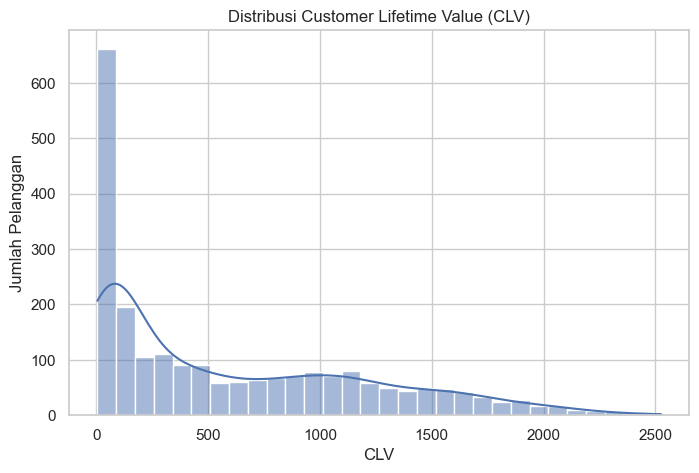

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(clv_df["CLV"], bins=30, kde=True)
plt.title("Distribusi Customer Lifetime Value (CLV)")
plt.xlabel("CLV")
plt.ylabel("Jumlah Pelanggan")
plt.show()

In [34]:
clv_df.to_csv('CLV baru.csv', index=False)